In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import os
import ast
from helpers import *

In [2]:
df = pd.read_csv("data_cleaned.csv", index_col=0)

In [3]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('-', '')
df.columns = df.columns.str.replace('&', '')


df= df[df['Movie_box_office_scaled'].notna()]
df= df[df['Movie_runtime'].notna()]
df= df[df['Actor_height_scaled'].notna()]
df= df[df['Actor_name'].notna()]
#df.reset_index(drop=True, inplace=True)
df['count']= df.groupby(['Actor_name']).Actor_name.transform('count')
df

,Movie_name,Movie_release_date,Movie_box_office_scaled,Movie_runtime,Actor_gender_male,Actor_height_scaled,Actor_name,Actor_age_at_movie_release,Cluster_Name_BWIndie,Cluster_Name_ComedyAction,...,Cluster_Name_ShortfilmWorldcinema,Cluster_Name_Thriller,Region_Asia,Region_Deadcountry,Region_EastEuropa,Region_NorthAmerica,Region_Oceania,Region_SouthAmerica,Region_WestEuropa,count
0,Ghosts of Mars,2001.0,7.912729e+06,98.0,0,1.031847,Wanda De Jesus,42.0,False,False,...,False,False,False,False,False,True,False,False,False,5
1,Ghosts of Mars,2001.0,7.912729e+06,98.0,0,1.133758,Natasha Henstridge,27.0,False,False,...,False,False,False,False,False,True,False,False,False,7
2,Ghosts of Mars,2001.0,7.912729e+06,98.0,1,0.990877,Ice Cube,32.0,False,False,...,False,False,False,False,False,True,False,False,False,20
3,Ghosts of Mars,2001.0,7.912729e+06,98.0,1,1.004074,Jason Statham,33.0,False,False,...,False,False,False,False,False,True,False,False,False,27
4,Ghosts of Mars,2001.0,7.912729e+06,98.0,0,1.050955,Clea DuVall,23.0,False,False,...,False,False,False,False,False,True,False,False,False,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199073,Guilty as Sin,1993.0,1.584282e+07,107.0,1,1.032761,Don Johnson,43.0,False,False,...,False,True,False,False,False,True,False,False,False,9
199074,Guilty as Sin,1993.0,1.584282e+07,107.0,0,1.059873,Rebecca De Mornay,33.0,False,False,...,False,True,False,False,False,True,False,False,False,15
199076,Guilty as Sin,1993.0,1.584282e+07,107.0,1,1.027024,Stephen Lang,40.0,False,False,...,False,True,False,False,False,True,False,False,False,17
199077,Guilty as Sin,1993.0,1.584282e+07,107.0,1,0.981123,Luis Guzmán,36.0,False,False,...,False,True,False,False,False,True,False,False,False,32


In [4]:
def gen25(year):
    if 1900<year<=1925:
        return "1900-1925"
    if 1925<year<=1950:
        return "1925-1950"
    if 1950<year<=1975:
        return "1950-1975"
    if 1975<year<=2000:
        return "1975-2000"
    if 2000<year<= 2025:
        return "2000-2025"

order = ["2000-2025","1975-2000","1950-1975","1925-1950","1900-1925"]

df['Generation'] = df['Movie_release_date'].apply(gen25)
df['Generation'] = df['Generation'].astype("category")
df['Generation'].cat.reorder_categories(order,ordered=True)

0         2000-2025
1         2000-2025
2         2000-2025
3         2000-2025
4         2000-2025
            ...    
199073    1975-2000
199074    1975-2000
199076    1975-2000
199077    1975-2000
199078    1975-2000
Name: Generation, Length: 46369, dtype: category
Categories (5, object): ['2000-2025' < '1975-2000' < '1950-1975' < '1925-1950' < '1900-1925']

In [5]:
listdf = [df[df.Generation== order[i]] for i in range(len(order)-1)]
#listdf[0]

In [6]:
cols = df.columns.difference(['Actor_gender_male','Generation','Actor_name','Movie_name','count'])

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in listdf:
    i[cols] = sc.fit_transform(i[cols])
    i.reset_index(drop=True, inplace=True)
#listdf[0]

C:\Users\cricl\AppData\Local\Temp\ipykernel_8592\2246421021.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i[cols] = sc.fit_transform(i[cols])
C:\Users\cricl\AppData\Local\Temp\ipykernel_8592\2246421021.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i[cols] = sc.fit_transform(i[cols])
C:\Users\cricl\AppData\Local\Temp\ipykernel_8592\2246421021.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [7]:
listdf[0].describe()

,Movie_release_date,Movie_box_office_scaled,Movie_runtime,Actor_gender_male,Actor_height_scaled,Actor_age_at_movie_release,Cluster_Name_BWIndie,Cluster_Name_ComedyAction,Cluster_Name_ComedyShortfilm,Cluster_Name_CrimeThriller,...,Cluster_Name_ShortfilmWorldcinema,Cluster_Name_Thriller,Region_Asia,Region_Deadcountry,Region_EastEuropa,Region_NorthAmerica,Region_Oceania,Region_SouthAmerica,Region_WestEuropa,count
count,2.285800e+04,2.285800e+04,2.285800e+04,22858.000000,2.285800e+04,2.285800e+04,2.285800e+04,2.285800e+04,2.285800e+04,2.285800e+04,...,2.285800e+04,2.285800e+04,2.285800e+04,22858.0,2.285800e+04,2.285800e+04,2.285800e+04,2.285800e+04,2.285800e+04,22858.000000
mean,2.357990e-14,8.082121e-17,2.325164e-16,0.639382,1.027673e-15,-3.326103e-17,1.927275e-17,-2.486806e-17,1.367743e-17,7.398249e-17,...,-1.305573e-17,4.973613e-18,-1.150148e-17,0.0,3.730209e-18,-1.367743e-16,-1.865105e-17,-4.351911e-18,-1.492084e-17,13.441946
std,1.000022e+00,1.000022e+00,1.000022e+00,0.480190,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,...,1.000022e+00,1.000022e+00,1.000022e+00,0.0,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,10.821366
min,-1.697517e+00,-6.018400e-01,-3.453670e+00,0.000000,-1.249654e+01,-2.538127e+00,-5.889063e-02,-4.332151e-01,-5.421953e-02,-3.434666e-01,...,-2.242019e-01,-2.767355e-01,-1.666966e-01,0.0,-3.859611e-02,-3.142357e+00,-5.257151e-02,-6.614399e-03,-2.534794e-01,1.000000
25%,-7.637104e-01,-5.474502e-01,-5.186897e-01,0.000000,-4.722331e-01,-6.847005e-01,-5.889063e-02,-4.332151e-01,-5.421953e-02,-3.434666e-01,...,-2.242019e-01,-2.767355e-01,-1.666966e-01,0.0,-3.859611e-02,3.182325e-01,-5.257151e-02,-6.614399e-03,-2.534794e-01,5.000000
50%,1.700962e-01,-3.774601e-01,-1.563464e-01,1.000000,1.163443e-01,-1.355370e-01,-5.889063e-02,-4.332151e-01,-5.421953e-02,-3.434666e-01,...,-2.242019e-01,-2.767355e-01,-1.666966e-01,0.0,-3.859611e-02,3.182325e-01,-5.257151e-02,-6.614399e-03,-2.534794e-01,11.000000
75%,7.926339e-01,6.684733e-02,3.146998e-01,1.000000,6.633881e-01,6.195627e-01,-5.889063e-02,-4.332151e-01,-5.421953e-02,-3.434666e-01,...,-2.242019e-01,-2.767355e-01,-1.666966e-01,0.0,-3.859611e-02,3.182325e-01,-5.257151e-02,-6.614399e-03,-2.534794e-01,20.000000
max,1.726440e+00,1.215685e+01,3.241831e+01,1.000000,5.871245e+00,3.845898e+00,1.698063e+01,2.308322e+00,1.844354e+01,2.911491e+00,...,4.460265e+00,3.613559e+00,5.998921e+00,0.0,2.590934e+01,3.182325e-01,1.902171e+01,1.511853e+02,3.945094e+00,65.000000


Optimization terminated successfully.
         Current function value: 0.568602
         Iterations 6


C:\Users\cricl\AppData\Local\Temp\ipykernel_8592\3124012728.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['Propensity_score'] = res.predict()


Number of successful matching: 212


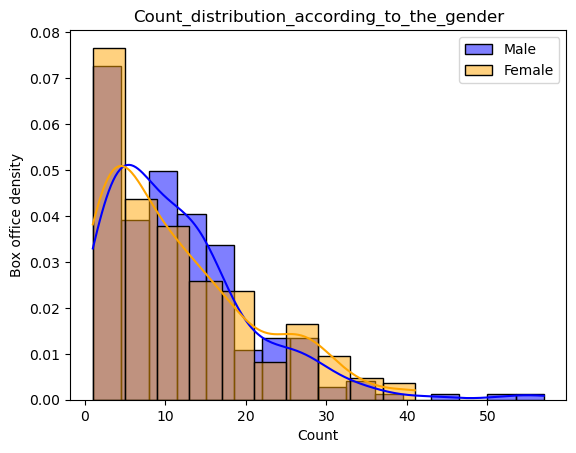

TtestResult(statistic=0.05683468294487066, pvalue=0.9547037854994043, df=422.0)
Optimization terminated successfully.
         Current function value: 0.550577
         Iterations 6


C:\Users\cricl\AppData\Local\Temp\ipykernel_8592\3124012728.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['Propensity_score'] = res.predict()


Number of successful matching: 208


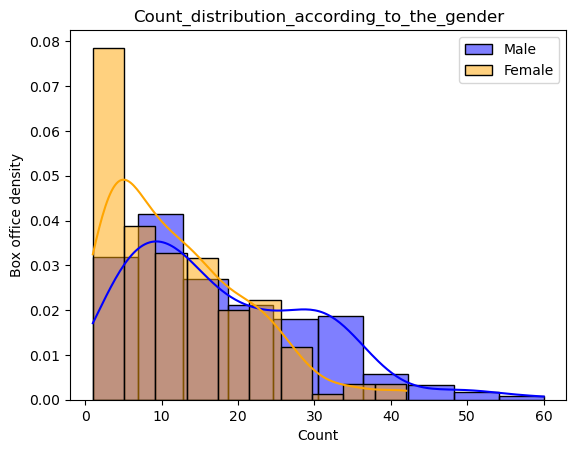

TtestResult(statistic=5.494594213282059, pvalue=6.854067580272584e-08, df=414.0)
Optimization terminated successfully.
         Current function value: 0.551617
         Iterations 6


C:\Users\cricl\AppData\Local\Temp\ipykernel_8592\3124012728.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['Propensity_score'] = res.predict()


Number of successful matching: 198


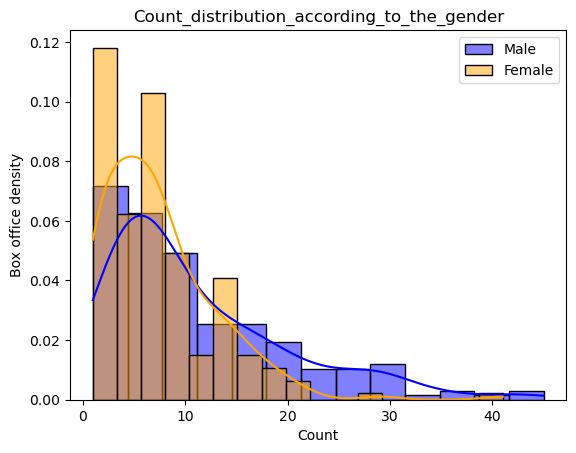

TtestResult(statistic=5.0763709446563015, pvalue=5.943906231601687e-07, df=394.0)
Optimization terminated successfully.
         Current function value: 0.587459
         Iterations 6


C:\Users\cricl\AppData\Local\Temp\ipykernel_8592\3124012728.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['Propensity_score'] = res.predict()


Number of successful matching: 218


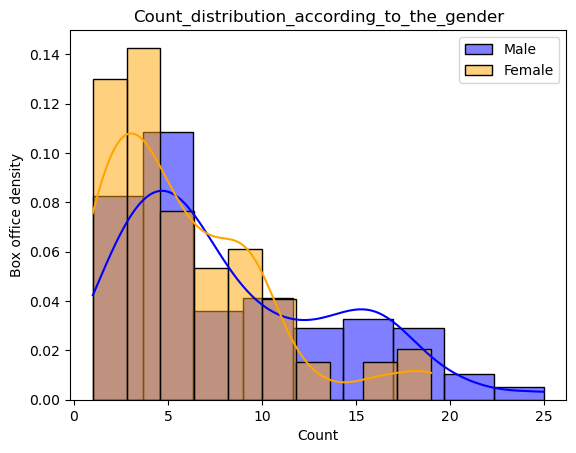

TtestResult(statistic=5.059130397186445, pvalue=6.229115403699841e-07, df=434.0)


In [29]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import networkx as nx
from scipy.stats import ttest_ind
def computediff(prop1,prop2):
    return np.abs(prop1-prop2)
def compute_similarity(prop1,prop2):
    return 1-np.abs(prop1-prop2)

list_cm=[]
list_cw = []
#fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True,sharex=True)
a=0
for i in listdf:
    mod = smf.logit(formula='Actor_gender_male ~  Movie_release_date * Movie_box_office_scaled +Movie_runtime+Actor_height_scaled \
                    +Actor_age_at_movie_release+ C(Cluster_Name_CrimeThriller)+ C(Cluster_Name_Drama)\
                    + C(Cluster_Name_BWIndie)+C(Cluster_Name_ComedyAction)+ C(Cluster_Name_ComedyShortfilm)+\
                    +C(Cluster_Name_DramaBW)+C(Cluster_Name_DramaComedy)+C(Cluster_Name_DramaIndie)+ C(Cluster_Name_DramaRomance)+C(Cluster_Name_DramaThriller)+C(Cluster_Name_RomanceComedy)\
                    +C(Cluster_Name_ShortfilmWorldcinema)+C(Cluster_Name_Thriller)', data=i)
    res = mod.fit()
    i['Propensity_score'] = res.predict()
    #print(res.summary())
    dftest = i.sample(n=700)
    control = dftest[dftest.Actor_gender_male == 0]
    treat =  dftest[dftest.Actor_gender_male == 1 ]  
    G = nx.Graph()
    for treat_id,treat_row in treat.iterrows():
        for control_id, control_row in control.iterrows():
            diff= computediff(control_row["Propensity_score"],treat_row["Propensity_score"])
            if (diff<0.05):
                similarity =  compute_similarity(control_row["Propensity_score"],treat_row["Propensity_score"])
                G.add_weighted_edges_from([(control_id, treat_id, similarity)])
    matching = nx.max_weight_matching(G)
    print("Number of successful matching:",len(matching))
    matched = [j[0] for j in list(matching)] + [j[1] for j in list(matching)]
    bd = i.iloc[matched]
    treated = bd.loc[bd['Actor_gender_male'] == 1]
    control= bd.loc[bd['Actor_gender_male'] == 0]
    ax = sns.histplot(treated['count'], kde=True, stat='density', color='blue', label='Male');
    ax = sns.histplot(control['count'], kde=True, stat='density', color='orange', label='Female')
    ax.set(title='Count_distribution_according_to_the_gender',xlabel='Count', ylabel='Box office density')
    plt.legend()
    plt.show()
    print(ttest_ind(treated['count'],control['count']))
    list_cm.append(treated['count'].mean())
    list_cw.append(control['count'].mean())


In [35]:
import scipy
vector=[[list_cm],[list_cw]]

res = scipy.stats.chi2_contingency(vector)
print("res.statistic:",res.statistic)
print("res.pavalue:",res.pvalue)


res.statistic: 0.6218416216151111
res.pavalue: 0.891414531762613
